In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math 
import numpy as np
import pandas as pd
from Regresion import Regresion

### Modelo de regresión

Separamos los datos en conjunto de entrenamiento y conjunto de prueba. El 80% de los datos se utilizó para entrenar el modelo y el 20% restante para evaluarlo. Empleamos la función `train_test_split()` de sklearn, estableciendo `test_size=0.2` para obtener las proporciones 80%-20% de los datos. De esta forma separamos adecuadamente los datos en los conjuntos de entrenamiento y prueba para construir y evaluar el modelo de regresión..

### Entrenamiento 

Para entrenar el modelo, consideramos 10 parámetros predictivos debido a que nos entregaron un coeficiente de correlación aceptable $ r > 0.5 $, se generaron 10 modelos secuencialmente.
>
El primer modelo se entrenó con el parámetro más relevante (mayor correlación), el segundo con los 2 parámetros más relevantes, y de esta manera se irán incluyendo los siguientes parámetros sucesivamente. Gracias a esto podremos evaluar el impacto de ir añadiendo parámetros para el entrenamiento y ver si el entrenamiento mejora.

In [2]:
def graficar_ys(y_train, y_pred_train, y_test, y_pred_test):
    plt.title("Grafico de conjunto de entrenamiento vs conjunto de pruebas")
    plt.scatter(y_train, y_pred_train, label='Conjunto entrenamiento', alpha = 0.5)
    plt.scatter(y_test, y_pred_test, label='Conjunto pruebas', alpha = 0.5)
    plt.legend()
    plt.show()

def crear_modelo(X_train, X_test, y_train, y_test, graficar=False):
    r = LinearRegression()
    r.fit(X_train, y_train)
    y_pred_train = r.predict(X_train)
    r2_score_train = np.round(r2_score(y_train, y_pred_train),4)
    y_pred_test = r.predict(X_test)
    r2_score_test = np.round(r2_score(y_test, y_pred_test),4)
    if graficar:
        graficar_ys(y_train, y_pred_train, y_test, y_pred_test)
        
    formatted_coeficientes = [f'{coef:.4f}' for coef in r.coef_]
    print(f'Coeficientes para {X_train.shape[1]} theta(s): {formatted_coeficientes}')
    print(f'Coeficientes R2 para conjunto de entrenamiento es {r2_score_train}')
    print(f'Coeficientes R2 para conjunto de pruebas es {r2_score_test}')
    MSE = mean_squared_error(y_test, y_pred_test)
    RMSE = math.sqrt(MSE)
    print(f'Mean square error: {MSE}')
    print(f'Root Mean square error: {RMSE}')
    print('----------------------------------------------------------------------------------------------------------------')
    return r, [r.coef_, r2_score_train, r2_score_test, MSE, RMSE]

def crear_modelo_con_n_thetas(file_name, numbers_thetas, graficar=False):
    modelos = []
    metricas = []
    df = pd.read_csv(file_name)
    print(f'El modelo tiene las siguientes datos: ')
    print(df.dtypes)
    print(f'\nTamaño dataframe: {df.shape}')
    X = df.iloc[:, 1:]
    y = df.iloc[:, 0 ]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    print(f'Tamaño de entrenamiento: {X_train.shape}\t 80%')
    print(f'Tamaño de pruebas: {X_test.shape}\t\t 20%')
    print('----------------------------------------------------------------------------------------------------------------')
    for i in range(1,numbers_thetas):
        modelo, metrica_modelo = crear_modelo(X_train.iloc[:, :i ], X_test.iloc[:, :i ], y_train, y_test)
        modelos.append(modelo)
        metricas.append(metrica_modelo)
    return modelos, metricas

#### Pasando los 10 parámetros mas significativos
- $ \theta_1 $ positioning
- $ \theta_2 $ finishing
- $ \theta_3 $ long_shots
- $ \theta_4 $ volleys
- $ \theta_5 $ ball_control
- $ \theta_6 $ shot_power
- $ \theta_7 $ free_kick_accuracy
- $ \theta_8 $ vision
- $ \theta_9 $ dribbling
- $ \theta_{10} $ curve

Los datos que se le proporcionara para el entrenamiento son datos que ya fueron trabajados con limpieza y normalización de datos

In [3]:
modelos, metricas = crear_modelo_con_n_thetas('normalized_data.csv',11 )

El modelo tiene las siguientes datos: 
penalties             float64
positioning           float64
finishing             float64
long_shots            float64
volleys               float64
ball_control          float64
shot_power            float64
free_kick_accuracy    float64
vision                float64
dribbling             float64
curve                 float64
dtype: object

Tamaño dataframe: (176161, 11)
Tamaño de entrenamiento: (140928, 10)	 80%
Tamaño de pruebas: (35233, 10)		 20%
----------------------------------------------------------------------------------------------------------------
Coeficientes para 1 theta(s): ['0.7544']
Coeficientes R2 para conjunto de entrenamiento es 0.5693
Coeficientes R2 para conjunto de pruebas es 0.5713
Mean square error: 0.42724011350292174
Root Mean square error: 0.6536360711458034
----------------------------------------------------------------------------------------------------------------
Coeficientes para 2 theta(s): ['0.4773', '0.3436

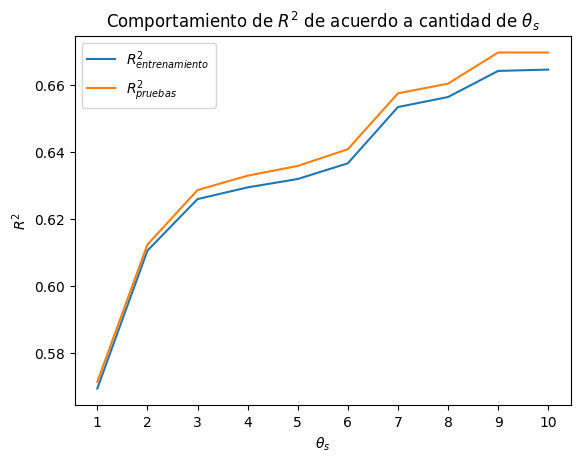

In [4]:
R_train = [sublista[1] for sublista in metricas]
R_test = [sublista[2] for sublista in metricas]
x_ticks = [1,2,3,4,5,6,7,8,9,10]

plt.plot(range(1,11), R_train, label='$R^2_{entrenamiento}$ ')
plt.plot(range(1,11), R_test, label='$R^2_{pruebas}$ ')
plt.title('Comportamiento de $R^2$ de acuerdo a cantidad de $\\theta_s$')
plt.xlabel('$\\theta_s$')
plt.ylabel('$R^2$')
plt.xticks(x_ticks)
plt.legend()
plt.show()

Se puede apreciar como a mayor cantidad de parámetros va mejorando pero no es una mejora significativa, ya que solo alcanzan el valor de 0.66%, si va mejorando pero no es un coeficiente de correlación significativo

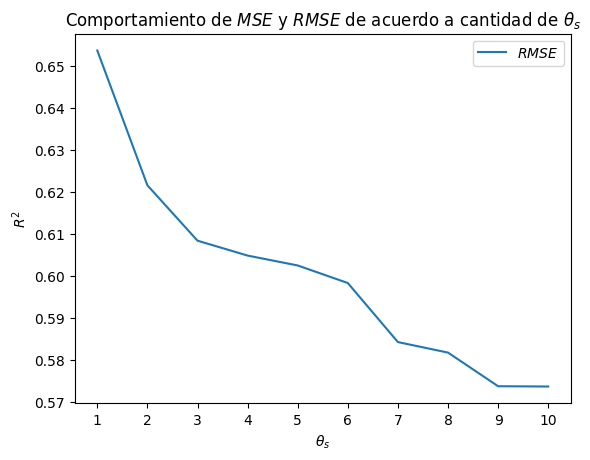

In [5]:
MSE = [sublista[3] for sublista in metricas]
RMSE = [sublista[4] for sublista in metricas]

x_ticks = [1,2,3,4,5,6,7,8,9,10]

plt.plot(range(1,11), RMSE, label='$RMSE$ ')
#plt.plot(range(1,11), MSE, label='$MSE$ ')
plt.title('Comportamiento de $MSE$ y $RMSE$ de acuerdo a cantidad de $\\theta_s$')
plt.xlabel('$\\theta_s$')
plt.ylabel('$R^2$')
plt.xticks(x_ticks)
plt.legend()
plt.show()

Como podemos observar, al igual que con $ R^2 $, en este caso conforme aumentamos nuestros $\theta_s$ tenemos mejores resultados.
>
En este caso, el error baja lo cual indica que nuestro modelo tiene una reacción favorable con la introducción de nuevos $\theta_s$, algo a resaltar es que el mayor salto significativo se da cuando se trabaja con 3 parámetros y después de ello va descendiendo pero no tan abruptamente 

In [6]:
data = pd.read_csv('normalized_data.csv')


Podemos apreciar que gracias a la normalizacion los datos no son dispersos, para esto se aggaro la columna que tiene mejor correlacion y la constrataremos con la columana que tiene la peor correlacion

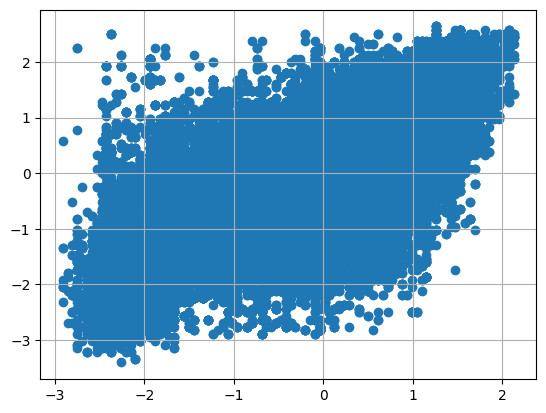

In [7]:
# capturamos la mejor columna con respecto a la correlación, positioning           0.754793
r = Regresion()
r.fit(data['positioning'].to_numpy().reshape(-1,1), data['penalties'].to_numpy())
r.graficar_data()

Creamos una instancia de la Regresion
Con la funcion fit agregamos como objetivo las columnas de 'positioning' y 'penalties'
para luego graficar los datos 


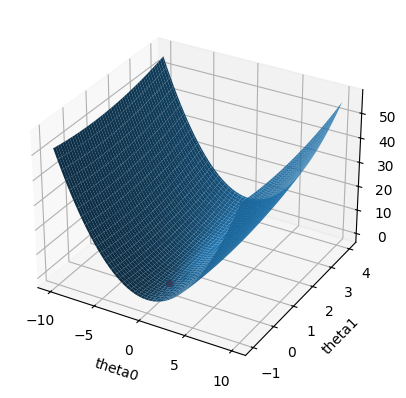

In [8]:
r.graficar_j_3d()

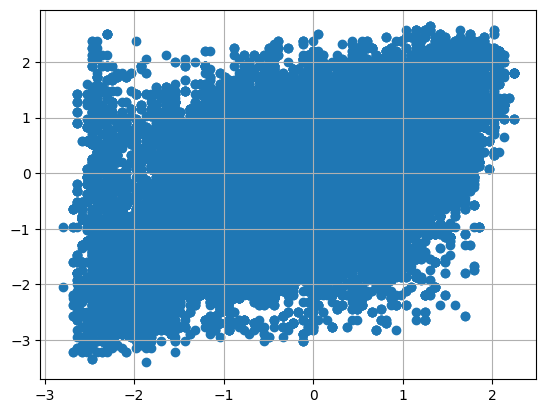

In [9]:
#En este caso se captura el parametro con peor correlacion, curve                 0.651492
r2 = Regresion()
r2.fit(data['curve'].to_numpy().reshape(-1,1), data['penalties'].to_numpy())
r2.graficar_data()

Con la funcion fit, hacemos objetivo a las Variables 'curve' y 'penalties' para luego
graficar y visualizar la data

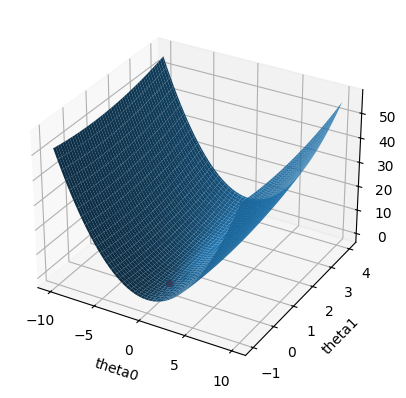

In [10]:
r.graficar_j_3d()